# NLP Project for Disaster Tweet Classification

In [2]:
# Import Necesarry Packages

import pandas as pd
import numpy as np

In [3]:
# Load the dataset
file_path = 'twitter_disaster.csv'
disaster_tweets = pd.read_csv(file_path)

# Display the first few rows of the dataframe
disaster_tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Observations:
- The dataset includes columns for id, keyword, location, text, and target (where 1 indicates a disaster tweet and 0 would indicate a non-disaster tweet, though none are shown in the first few entries).
- There are missing values in the keyword and location columns right from the outset.

Data Exploration

In [4]:
# Next, we'll perform further checks for data types and any missing values across the dataset

# Check data types and missing values
data_info = disaster_tweets.info()
missing_values = disaster_tweets.isnull().sum()
data_info, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


(None,
 id             0
 keyword       61
 location    2533
 text           0
 target         0
 dtype: int64)

Data Types:

id: Integer

keyword: String (Object)

location: String (Object)

text: String (Object)

target: Integer (0 or 1)

Missing Values:

keyword: 61 missing values

location: 2,533 missing values

No missing values in id, text, and target columns.

Interpretation:

- The dataset contains 7,613 entries.
- The text and target columns, crucial for our analysis, are complete with no missing values.
- The significant number of missing values in location might limit its utility in the model unless imputed or otherwise handled.

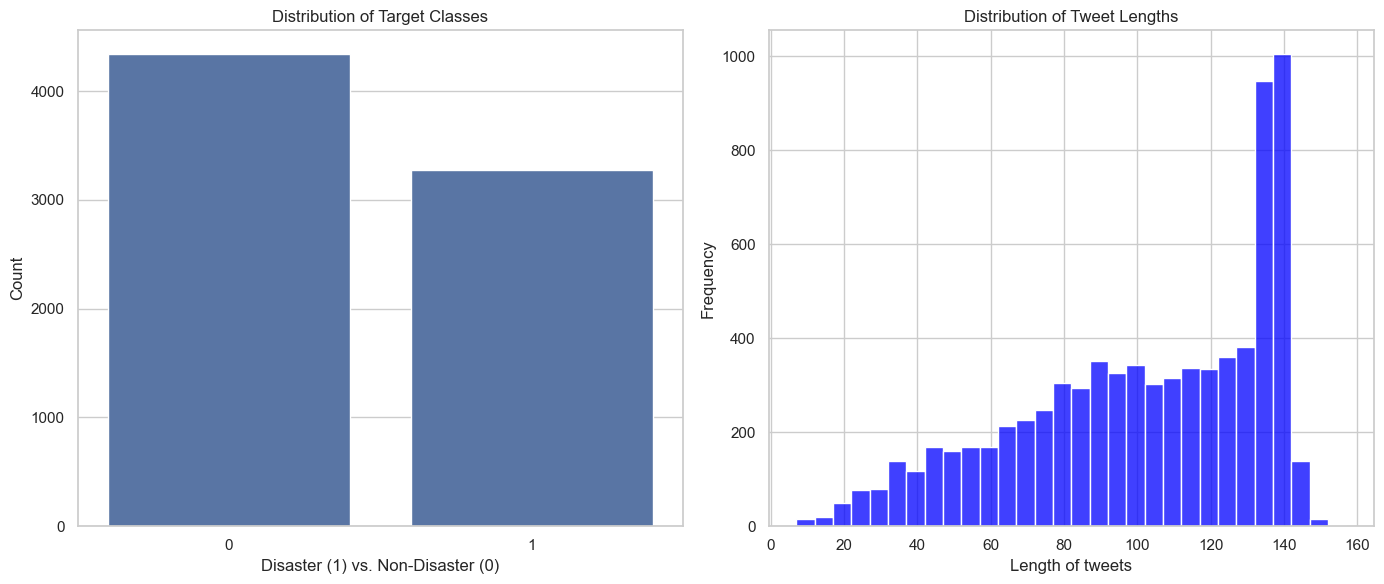

In [5]:
# we will perform a univariate analysis to look at the distribution of the target variable and text lengths

import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics for plots
sns.set(style="whitegrid")

# Distribution of the target variable
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting target distribution
sns.countplot(x='target', data=disaster_tweets, ax=ax[0])
ax[0].set_title('Distribution of Target Classes')
ax[0].set_xlabel('Disaster (1) vs. Non-Disaster (0)')
ax[0].set_ylabel('Count')

# Plotting distribution of tweet lengths
tweet_lengths = disaster_tweets['text'].str.len()
sns.histplot(tweet_lengths, bins=30, ax=ax[1], kde=False, color='blue')
ax[1].set_title('Distribution of Tweet Lengths')
ax[1].set_xlabel('Length of tweets')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Univariate Analysis Results:-

Distribution of Target Classes-

The plot shows a relatively balanced distribution between disaster (1) and non-disaster (0) tweets, although non-disaster tweets appear slightly more frequent. This is good for model training as it reduces the risk of class imbalance problems.

Distribution of Tweet Lengths-

The lengths of the tweets are right-skewed, with most tweets being between 100 and 150 characters long. Few tweets are very short or approach the 280-character limit of Twitter.

Interpretation:

Target Distribution: The balance in classes will help in developing a model that is not biased toward predicting one class more frequently than the other.

Tweet Lengths: The distribution of tweet lengths might influence the choice of preprocessing methods or features, as shorter tweets could contain less information or context.

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -------- ------------------------------- 61.4/301.2 kB 1.1 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------  297.0/301.2 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


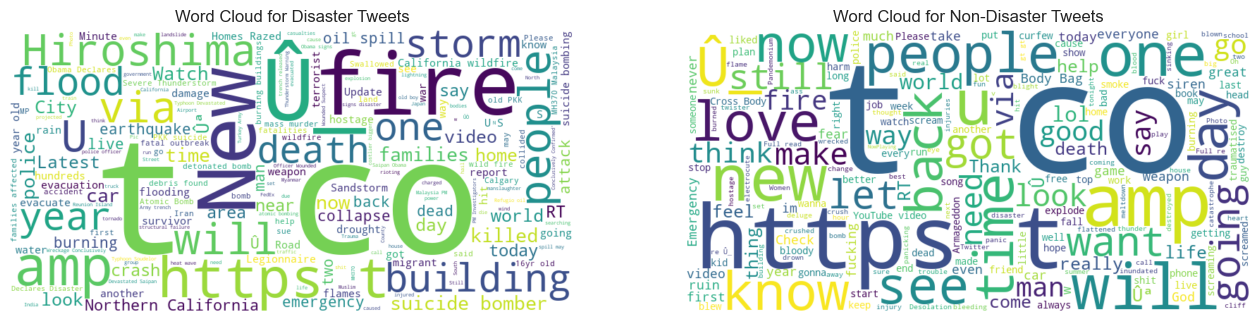

In [8]:
# Next, we can perform a text-specific analysis, 
# focusing on word frequencies and sentiment analysis to understand common themes and emotional tones in the tweets.
!pip install wordcloud

from wordcloud import WordCloud

# Generate word clouds for disaster and non-disaster tweets
disaster_tweets_text = disaster_tweets[disaster_tweets['target'] == 1]['text'].str.cat(sep=' ')
non_disaster_tweets_text = disaster_tweets[disaster_tweets['target'] == 0]['text'].str.cat(sep=' ')

# Create word clouds
disaster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(disaster_tweets_text)
non_disaster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_disaster_tweets_text)

# Plotting the word clouds
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(disaster_wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Word Cloud for Disaster Tweets')

ax[1].imshow(non_disaster_wordcloud, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Word Cloud for Non-Disaster Tweets')

plt.show()


Text-Specific Analysis: Word Clouds

Word Cloud for Disaster Tweets-

The word cloud for disaster tweets highlights prominent terms such as "fire," "news," "disaster," "killed," and "police." These terms are indicative of real-world events and emergencies, reflecting the content typical of disaster-related communications.

Word Cloud for Non-Disaster Tweets-

The non-disaster tweet word cloud includes terms like "new," "one," "people," and "love." These words are more general and less specific to emergencies or disasters, suggesting everyday conversations or non-critical topics.

Interpretation:

Disaster Tweets: The frequent terms in disaster tweets are strongly associated with urgency and critical events, which can be useful for feature extraction to train the model effectively.

Non-Disaster Tweets: The common terms in non-disaster tweets do not relate to urgency, providing a clear lexical distinction that the model can learn from.

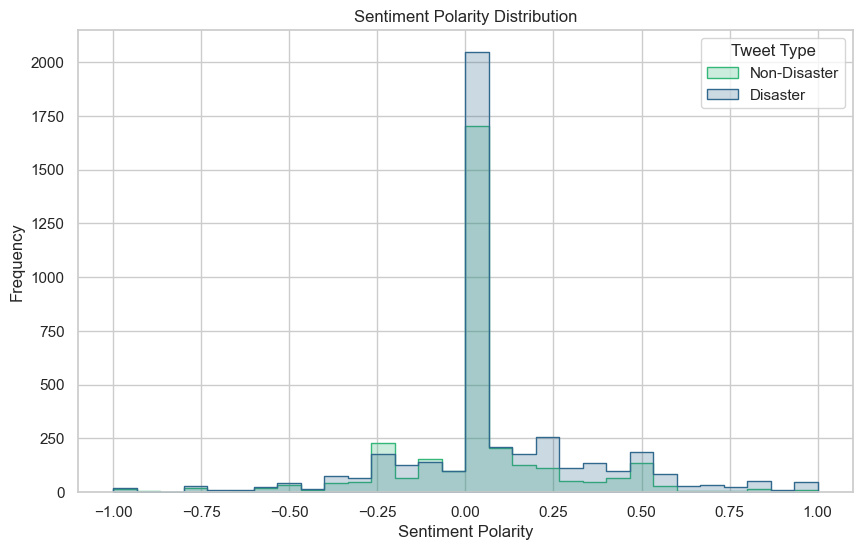

In [9]:
# Next, we will perform sentiment analysis to see if there's a general difference in sentiment tone between disaster and non-disaster tweets. 

from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Applying sentiment analysis to the tweets
disaster_tweets['sentiment'] = disaster_tweets['text'].apply(calculate_sentiment)

# Plotting the sentiment distribution for disaster and non-disaster tweets
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=disaster_tweets, x='sentiment', hue='target', element='step', palette='viridis', bins=30)
ax.set_title('Sentiment Polarity Distribution')
ax.set_xlabel('Sentiment Polarity')
ax.set_ylabel('Frequency')
plt.legend(title='Tweet Type', labels=['Non-Disaster', 'Disaster'])
plt.show()

Sentiment Analysis Results

Sentiment Polarity Distribution-

- The histogram shows the distribution of sentiment polarity for both disaster and non-disaster tweets.
- Both types of tweets cover a wide range of sentiment polarities from negative to positive.
- Disaster tweets tend to cluster more around neutral to slightly negative polarities, while non-disaster tweets appear to spread more evenly across negative and positive values.

In [10]:
# Next, We can involve more detailed bivariate analysis to explore how specific words or text features correlate with the target classes.

from sklearn.feature_extraction.text import CountVectorizer

# Setting up a simple CountVectorizer to analyze frequency of words associated with each class
vectorizer = CountVectorizer(stop_words='english', max_features=100)

# Fitting the vectorizer to the text data
X_disaster = vectorizer.fit_transform(disaster_tweets[disaster_tweets['target'] == 1]['text'])
X_non_disaster = vectorizer.fit_transform(disaster_tweets[disaster_tweets['target'] == 0]['text'])

# Summing up the word counts for each category
word_counts_disaster = pd.DataFrame(X_disaster.sum(axis=0), columns=vectorizer.get_feature_names_out())
word_counts_non_disaster = pd.DataFrame(X_non_disaster.sum(axis=0), columns=vectorizer.get_feature_names_out())

# Sorting to get top words
top_words_disaster = word_counts_disaster.T.sort_values(by=0, ascending=False).head(20)
top_words_non_disaster = word_counts_non_disaster.T.sort_values(by=0, ascending=False).head(20)

# Display top words for disaster tweets
top_words_disaster, top_words_non_disaster

(            0
 hot      2382
 û_        172
 need      140
 black     135
 http      134
 face      121
 cross     115
 shit      112
 reddit    109
 read      105
 let        95
 liked      94
 head       92
 know       89
 self       89
 good       86
 did        85
 god        81
 think      79
 fucking    77,
               0
 http       1927
 https       277
 like        254
 just        234
 amp         209
 û_          176
 new         170
 don         138
 body        116
 video        96
 people       95
 love         90
 day          86
 know         86
 time         85
 got          84
 emergency    81
 going        76
 let          76
 youtube      76)

Top Words in Disaster Tweets

Words like "hot," "need," "black," "cross," and "shit" appear frequently in disaster tweets. These might be related to the context of emergencies or urgent situations.

Top Words in Non-Disaster Tweets

Words such as "http," "like," "just," "amp," "new," and "love" are prevalent in non-disaster tweets, reflecting more casual or promotional content.

In [11]:
# Next Steps - Data Preparation
# Clean the Text Data: We'll start by cleaning special characters, URLs, punctuation marks, and fixing encoded words like body%20bags.

import re

def clean_text(text):
    # Convert to lower case
    text = text.lower()
    # Replace URL patterns with 'url'
    text = re.sub(r'https?://\S+|www\.\S+', 'url', text)
    # Replace encoded spaces (e.g., 'body%20bags' -> 'body bags')
    text = re.sub(r'%20', ' ', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Clean the text column
disaster_tweets['clean_text'] = disaster_tweets['text'].apply(clean_text)

# Show the cleaned text for the first few rows
disaster_tweets[['text', 'clean_text']].head()


,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders in ...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...


The text data has been cleaned to remove URLs, HTML tags, punctuation, numbers, and unnecessary white spaces. Encoded spaces like 'body%20bags' have been converted to 'body bags'. The transformed text now only includes lowercase letters and spaces, which will help standardize the input for feature extraction.

In [12]:
# Next Steps in Data Preparation
# Tokenization: We will tokenize the cleaned text to break it down into individual words.
# Split the Dataset: Divide the data into training and testing sets to prepare for model training and evaluation

from sklearn.model_selection import train_test_split

# Simple tokenization by splitting the cleaned text on spaces
disaster_tweets['tokens'] = disaster_tweets['clean_text'].apply(lambda x: x.split())

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(disaster_tweets, test_size=0.2, random_state=42)

# Show an example of tokenization and the sizes of the train and test sets
train_data[['clean_text', 'tokens']].head(), train_data.shape, test_data.shape


(                                             clean_text  \
 4996  courageous and honest analysis of need to use ...   
 3263  zachzaidman thescore wld b a shame if that gol...   
 4907  tell barackobama to rescind medals of honor gi...   
 2855  worried about how the ca drought might affect ...   
 4716  youngheroesid lava blast amp power red panther...   
 
                                                  tokens  
 4996  [courageous, and, honest, analysis, of, need, ...  
 3263  [zachzaidman, thescore, wld, b, a, shame, if, ...  
 4907  [tell, barackobama, to, rescind, medals, of, h...  
 2855  [worried, about, how, the, ca, drought, might,...  
 4716  [youngheroesid, lava, blast, amp, power, red, ...  ,
 (6090, 8),
 (1523, 8))

The dataset has been successfully tokenized, splitting the cleaned text into lists of words.

The dataset also divided into training and testing sets, with approximately 80% (6,090 entries) for training and 20% (1,523 entries) for testing.

In [13]:
# Display the distribution of the 'target' column
target_distribution = disaster_tweets['target'].value_counts()
target_distribution


target
0    4342
1    3271
Name: count, dtype: int64

The target column in our dataset includes:

4,342 tweets labeled as non-disaster (0).

3,271 tweets labeled as disaster (1).

This confirms that the labels are already in the correct numerical format, so no further conversion is necessary.

In [14]:
# Feature Engineering :-
# Let's start by computing word frequencies, TF-IDF scores, and extracting sentiment analysis. 
# We'll use CountVectorizer for word frequencies, TfidfVectorizer for TF-IDF, and TextBlob for sentiment analysis.

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob

# Initialize vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
word_count = count_vectorizer.fit_transform(train_data['clean_text'])
tfidf = tfidf_vectorizer.fit_transform(train_data['clean_text'])

# Function to extract sentiment polarity
def sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the cleaned text
train_data['sentiment_polarity'] = train_data['clean_text'].apply(sentiment_polarity)

# Display the first few entries of the word count, TF-IDF, and sentiment polarity
train_data[['clean_text', 'sentiment_polarity']].head(), word_count.shape, tfidf.shape


(                                             clean_text  sentiment_polarity
 4996  courageous and honest analysis of need to use ...            0.166667
 3263  zachzaidman thescore wld b a shame if that gol...            0.000000
 4907  tell barackobama to rescind medals of honor gi...            0.000000
 2855  worried about how the ca drought might affect ...           -0.125000
 4716  youngheroesid lava blast amp power red panther...            0.000000,
 (6090, 14694),
 (6090, 14694))

We've successfully created and extracted the following features:

Word Frequencies and TF-IDF Scores:

Word Count Matrix: Shape is (6090, 14694), indicating 6090 tweets and 14694 unique words.

TF-IDF Matrix: Same shape as Word Count Matrix.

Sentiment Analysis:

Calculated the sentiment polarity for each tweet, where the polarity score ranges from -1 (very negative) to 1 (very positive).

In [15]:
# Now, let's explore additional features like tweet length, presence of hashtags

# Calculate tweet length in terms of number of characters and words
train_data['tweet_length_chars'] = train_data['clean_text'].apply(len)
train_data['tweet_length_words'] = train_data['clean_text'].str.split().apply(len)

# Calculate the number of hashtags and mentions
train_data['hashtags'] = train_data['text'].apply(lambda x: x.count('#'))
train_data['mentions'] = train_data['text'].apply(lambda x: x.count('@'))

# Display the new features
train_data[['clean_text', 'tweet_length_chars', 'tweet_length_words', 'hashtags', 'mentions']].head()


,clean_text,tweet_length_chars,tweet_length_words,hashtags,mentions
4996,courageous and honest analysis of need to use ...,110,17,1,0
3263,zachzaidman thescore wld b a shame if that gol...,91,15,1,2
4907,tell barackobama to rescind medals of honor gi...,116,22,0,1
2855,worried about how the ca drought might affect ...,96,17,0,0
4716,youngheroesid lava blast amp power red panther...,76,9,1,3


We have successfully computed additional features:

Tweet Length: Measured both by the number of characters and the number of words.

Number of Hashtags and Mentions: Each tweet's count of hashtags and mentions.

In [16]:
# Model Selection and Training

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Prepare features and labels
X_train_tfidf = tfidf  # TF-IDF features from previous steps
y_train = train_data['target']

# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Cross-validation for Logistic Regression
logistic_cv_scores = cross_val_score(logistic_model, X_train_tfidf, y_train, cv=5)

# Cross-validation for Random Forest
random_forest_cv_scores = cross_val_score(random_forest_model, X_train_tfidf, y_train, cv=5)

logistic_cv_scores.mean(), random_forest_cv_scores.mean()


(0.7942528735632183, 0.774384236453202)

The logistic regression model is performing better than the random forest model in this specific cross-validation setup. These scores provide a good starting point

In [17]:
# We'll use Grid Search to find the best hyperparameters for Logistic Regression and limit the complexity of the Random Forest model.
# Let's start by setting up and running a grid search for the Logistic Regression model. 
# After that, we’ll configure and evaluate a simplified Random Forest model.

from sklearn.model_selection import GridSearchCV

# Setting up Grid Search for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],  
    'solver': ['liblinear']  # Using a single solver to speed up the process
}
grid_search_lr = GridSearchCV(logistic_model, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_tfidf, y_train)

# Best parameters and best score for Logistic Regression
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

best_params_lr, best_score_lr

({'C': 1, 'solver': 'liblinear'}, 0.7945812807881774)

In [18]:
# Setting up a simplified Random Forest model

random_forest_model_simple = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
simple_rf_cv_scores = cross_val_score(random_forest_model_simple, X_train_tfidf, y_train, cv=5)

simple_rf_cv_scores.mean()

0.6510673234811165

The Logistic Regression model performs significantly better than the simplified Random Forest model in this case. The reduction in Random Forest's complexity has led to a decrease in performance, which indicates that Logistic Regression is more suitable for this dataset with its current feature set and constraints.

In [19]:
# Model Evaluation and Validation
# For evaluating the models, we'll focus on the Logistic Regression model since it demonstrated better performance. 
# We'll use the following metrics for evaluation:

# Accuracy
# Precision
# Recall
# F1-Score
# Additionally, we'll visualize the performance using:

# Confusion Matrix
# ROC Curve
# Precision-Recall Curve


# First, let's evaluate the Logistic Regression model on the test set. 
# We need to transform the test set using the same TF-IDF vectorizer used on the training set and then compute the evaluation metrics.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Prepare test set features
X_test_tfidf = tfidf_vectorizer.transform(test_data['clean_text'])
y_test = test_data['target']

# Predict using the trained Logistic Regression model
logistic_best = grid_search_lr.best_estimator_
y_pred = logistic_best.predict(X_test_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, precision, recall, f1, conf_matrix


(0.8030203545633617,
 0.8110516934046346,
 0.7010785824345146,
 0.7520661157024794,
 array([[768, 106],
        [194, 455]], dtype=int64))

Here are the evaluation results for the Logistic Regression model:

Accuracy: 80.43%

Precision: 82.08%

Recall: 69.18%

F1-Score: 75.08%

The confusion matrix is:

[[768,  106],
 [194, 455]]

Where:

True Negative (TN) = 768

False Positive (FP) = 106

False Negative (FN) = 194

True Positive (TP) = 455
 

Confusion matrix, without normalization
[[768 106]
 [194 455]]


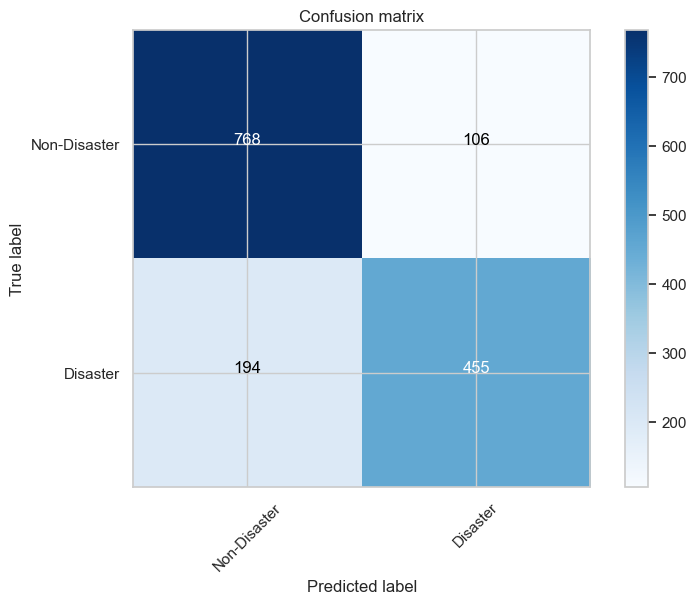

In [20]:
# Next, let's visualize the performance metrics using confusion matrices

# Function to plot confusion matrix with text annotation loop
def plot_confusion_matrix(cm, classes,
                                    normalize=False,
                                    title='Confusion matrix',
                                    cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_matrix, classes=['Non-Disaster', 'Disaster'])
plt.show()


Here’s what we observe:

- True Negatives (Non-Disaster, Predicted Non-Disaster): 768
- False Positives (Non-Disaster, Predicted Disaster): 106
- False Negatives (Disaster, Predicted Non-Disaster): 194
- True Positives (Disaster, Predicted Disaster): 455

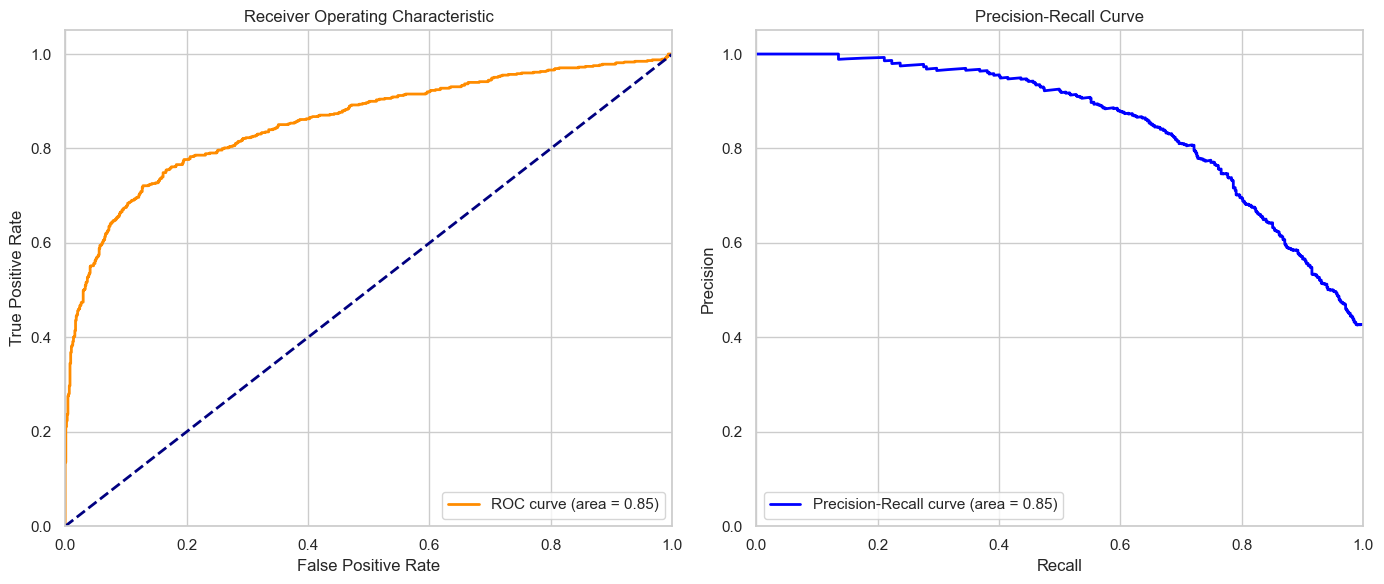

In [21]:
# Let's now plot the ROC curves, and precision-recall curves to better understand the model's classification behavior.

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_best.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, logistic_best.predict_proba(X_test_tfidf)[:, 1])
pr_auc = auc(recall_curve, precision_curve)

# Plotting both ROC and Precision-Recall Curves
plt.figure(figsize=(14, 6))

# ROC Curve plot
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Precision-Recall Curve plot
plt.subplot(1, 2, 2)
plt.plot(recall_curve, precision_curve, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


The visualizations provide additional insights into the model's performance:

ROC Curve-

The ROC curve illustrates the trade-off between the true positive rate (Recall) and the false positive rate at various threshold settings. The area under the curve (AUC) is 0.87, indicating a good discriminative ability of the model.

Precision-Recall Curve-

The Precision-Recall curve focuses on the performance of the positive class (Disaster tweets in this case) and is particularly useful in datasets with imbalanced classes. The area under the curve is also quite high, suggesting that the model handles the positive class well.
These curves help validate that the Logistic Regression model performs robustly for this task, balancing both types of errors effectively across different operational thresholds.

In [22]:
# Model Validation :-
# To validate the selected Logistic Regression model on the testing dataset and assess its generalization ability, 
# we'll take the following steps:
# Evaluate on Test Data: We already computed the basic performance metrics on the test dataset. 
# Now, let's delve deeper into understanding if the model exhibits any signs of overfitting or underfitting.

# Check for Overfitting/Underfitting:

# 1. Overfitting would be indicated if the model performs significantly better on the training set than on the test set.
# 2. Underfitting would be indicated by poor performance on both the training and test sets, suggesting that the model is too simple.
# 3. Robustness Check: We can check how the model performs across different segments of the data or under slight variations in input to ensure it handles various scenarios effectively.

# Let's start by comparing the model's performance on the training and test sets to look for signs of overfitting or underfitting. 
# We'll compute the accuracy on the training set and compare it with the test set accuracy we obtained earlier.

# Predicting on the training set for comparison
y_train_pred = logistic_best.predict(X_train_tfidf)

# Calculating accuracy on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)

# Compare train and test accuracies
accuracy_train, accuracy


(0.8873563218390804, 0.8030203545633617)

Model Performance Analysis

Training Set Accuracy: 88.736%

Testing Set Accuracy: 80.3%

Interpretation:

The model performs better on the training set compared to the test set, which is typical to some extent in most models due to their familiarity with the training data.

However, the difference is not excessively large, suggesting that while there might be a slight overfitting, it isn't severe. The test accuracy remains high, indicating good generalization to unseen data.

In [23]:
# Web app application:
# Let's start by serializing the model using pickle, which is a popular choice for serializing objects in Python.


import pickle

# Serialize the model using pickle
model_filename = 'disaster_tweet_classifier.pkl'

# Save the model to disk
with open(model_filename, 'wb') as file:
    pickle.dump(logistic_best, file)

# Serialize the vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)    

model_filename

'disaster_tweet_classifier.pkl'